In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt

In [2]:
idxmap=pd.read_csv("../input/spark_train_cleaned.csv",usecols=["Page"])['Page'].to_dict()

In [3]:
keys=pd.read_csv("../input/key_1.csv",index_col=0)
keys_dict=keys["Id"].to_dict()
len(keys_dict)

8703780

# make submission

In [5]:
pred=pd.read_csv("../input/spark_pred_bydate_xgblog.csv",header=None)

In [7]:
date_cols=pd.date_range(pd.datetime.date(datetime.datetime(2017, 1, 1)), periods=60).map(lambda u: u.strftime("%Y-%m-%d")).tolist()
pred.columns=['ppage','Date']+date_cols

In [8]:
pred['pageidx']=pred.ppage.map(lambda u: int(u[1:]))

In [9]:
pred=pred.sort_values("pageidx")

In [10]:
for col in date_cols:
    pred[col]=np.exp(pred[col]) 

In [11]:
pred['page']=pred['pageidx'].map(lambda u: idxmap[u])

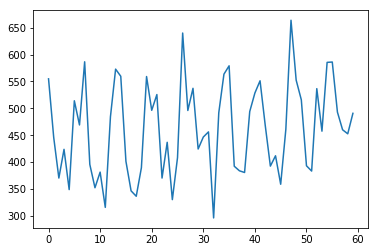

In [22]:
plt.plot(pred.loc[int(np.random.random()*pred.shape[0]),date_cols].values);

In [23]:
pred.index=pred['pageidx']

In [27]:
submission=pred.drop(['ppage','Date','pageidx','page'],axis=1)

In [28]:
submission=submission.unstack().reset_index()


In [29]:
submission['page']=submission['pageidx'].map(lambda u: idxmap[u])

In [30]:
submission['Id']=submission[['page','level_0']].apply(lambda u: "{}_{}".format(u.values[0],u.values[1]),axis=1)

In [31]:
submission=submission[['Id',0]]

In [32]:
submission["Id"]=submission["Id"].apply(lambda u:keys_dict[u])

In [33]:
submission.isnull().sum().sum()

0

In [34]:
newsubmission=submission
newsubmission.index=newsubmission['Id']
newsubmission=newsubmission.drop("Id",axis=1)

In [35]:
newsubmission.columns=['Visits']

In [36]:
(newsubmission.Visits<0.5).mean(),(newsubmission.Visits<0).mean()

(0.0, 0.0)

In [37]:
newsubmission.head()

Visits
Id                     
ff8c1aade3de  17.710800
3da6fd5b23c1  19.602623
cd9e83803be4   4.689676
65cd4af0968c  15.672041
75bae1fb2637   9.819928

In [38]:
newsubmission.to_csv("../submission/sub_pred_xgblog_bydate.csv.gz",
                                    float_format='%.1f', compression="gzip")